## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")


## Dictionary

Provided from Kagle website at https://www.kaggle.com/cblesa/world-of-warcraft-battlegrounds#wowbgs.csv

- Faction: faction of the player (Horde or Alliance).
- Class: class of the player (warrior, paladin, hunter, rogue, priest, death knight, shaman, mage, warlock, monk, druid, demon hunter).
- KB: number of mortal kills given by the player.
- D: number of times that the player died.
- HK: number of killings where the player or his/her group contributed.
- DD: damage done by the player.
- HD: healing done by the player.
- Honor: honor awarded to the player.
- Win: 1 if the player won.
- Lose: 1 if the player lost.
- Rol: dps if the player is a damage dealer; heal if the player is focused in healing allies. Note that not all classes can be healers, just shaman, paladin, priest, monk and druid, but all classes can be damage dealers.
- BE: some weeks there is a bonus event, when the honor gained is increased. 1 if the battleground happened during that week.

## Acquire

csv were downloaded from Kagle at https://www.kaggle.com/cblesa/world-of-warcraft-battlegrounds#wowbgs.csv

In [2]:
df = pd.read_csv('wowbgs2.csv')
gil_df = pd.read_csv('wowgil2.csv')
sm_df = pd.read_csv('wowsm2.csv')
tk_df = pd.read_csv('wowtk2.csv')
wg_df = pd.read_csv('wowwg2.csv')


## Preperation

- Data was very clean from Kagle.
- No missing values except for in columns where the data was bianary.
- I filled NaN's with 0 or 1 based on the bianary of the column. 0 = No and 1 = Yes

In [3]:
bg_list = [df, gil_df, sm_df, tk_df, wg_df]

for bg in bg_list:
    bg.fillna(0, inplace=True)

In [4]:
# Just setting up colors to make data viz match WoW's color scheme.

classes = ['Death Knight', 'Demon Hunter', 'Druid', 'Hunter', 'Mage', 'Monk', 
           'Paladin','Priest', 'Rogue', 'Shaman', 'Warlock', 'Warrior']
class_colors = ['#C41F3B', '#A330C9', '#FF7D0A', '#ABD473', '#40C7EB', '#00FF96',
                '#F58CBA', '#FFFFFF', '#FFF569', '#0070DE', '#8787ED', '#C79C6E']
class_color_dict = dict(zip(classes, class_colors))

healers = ['Druid', 'Monk', 'Paladin','Priest', 'Shaman']
healer_colors = ['#FF7D0A','#00FF96', '#F58CBA', '#FFFFFF', '#0070DE']

win_color = ['#008000']
loss_color = ['#ff0000']


faction = ['Alliance', 'Horde']
faction_color = ['#162c57', '#8C1616']
faction_color_dict = dict(zip(faction, faction_color))


## Exploration



### Which faction win more scenarios?
- Horde regularly wins more battlegrounds

In [5]:
# Overall bgs

df.groupby('Faction').sum()[['Win']]

,Win
Faction,
Alliance,1000.0
Horde,1723.0


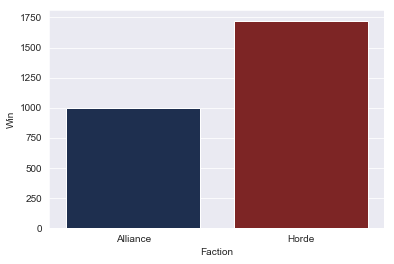

In [6]:
# Overall bgs

sns.barplot(data=df, x='Faction', y='Win', estimator=sum, order=faction, palette=faction_color, ci=None)

Text(0.5, 1.0, 'Warsong Gulch')

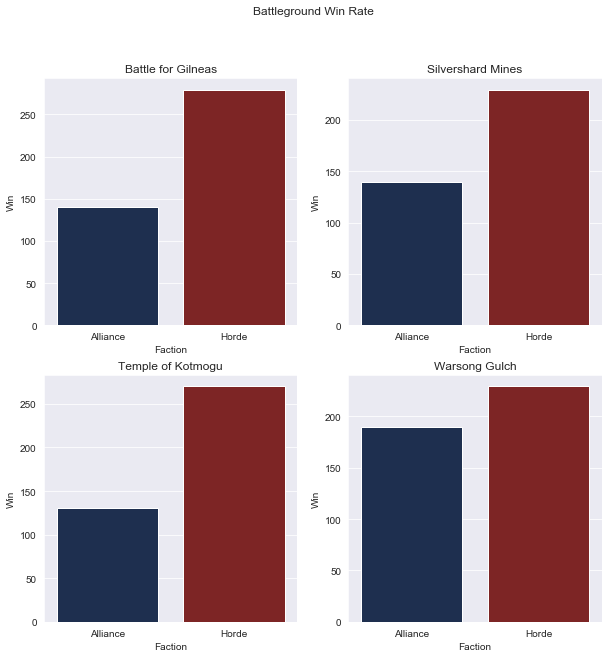

In [7]:
plt.figure(figsize=(10,10))
plt.suptitle('Battleground Win Rate')

plt.subplot(221)
sns.barplot(data=gil_df, x='Faction', y='Win', estimator=sum, order=faction, palette=faction_color, ci=None)
plt.title('Battle for Gilneas')

plt.subplot(222)
sns.barplot(data=sm_df, x='Faction', y='Win', estimator=sum, order=faction, palette=faction_color, ci=None)
plt.title('Silvershard Mines')

plt.subplot(223)
sns.barplot(data=tk_df, x='Faction', y='Win', estimator=sum, order=faction, palette=faction_color, ci=None)
plt.title('Temple of Kotmogu')

plt.subplot(224)
sns.barplot(data=wg_df, x='Faction', y='Win', estimator=sum, order=faction, palette=faction_color, ci=None)
plt.title('Warsong Gulch')



### What is the chance of winning for every class?

In [24]:
win_loss = df[['Class', 'Win', 'Lose']].groupby('Class').sum()
win_loss['total'] = win_loss.Win + win_loss.Lose
win_loss['avg_win_percent'] = win_loss.Win/(win_loss.Win + win_loss.Lose)*100
win_loss['avg_lose_percent'] = win_loss.Lose/(win_loss.Win + win_loss.Lose)*100
win_loss.sort_values('avg_win_percent', ascending=False)

,Win,Lose,total,avg_win_percent,avg_lose_percent
Class,,,,,
Shaman,323.0,265.0,588.0,54.931973,45.068027
Death Knight,185.0,158.0,343.0,53.935860,46.064140
Rogue,230.0,198.0,428.0,53.738318,46.261682
Demon Hunter,202.0,176.0,378.0,53.439153,46.560847
Warlock,216.0,200.0,416.0,51.923077,48.076923
Monk,119.0,113.0,232.0,51.293103,48.706897
Priest,234.0,232.0,466.0,50.214592,49.785408
Paladin,240.0,246.0,486.0,49.382716,50.617284
Warrior,259.0,268.0,527.0,49.146110,50.853890


### Which class is the lethalest?

- Based on Killing blows it is the Warrior

In [8]:
df.groupby('Class').sum().sort_values('KB', ascending=False)[['KB']].head()

,KB
Class,
Warrior,2347
Warlock,1670
Mage,1595
Paladin,1534
Hunter,1458


Text(0.5, 1.0, 'Killing Blow Count By Class')

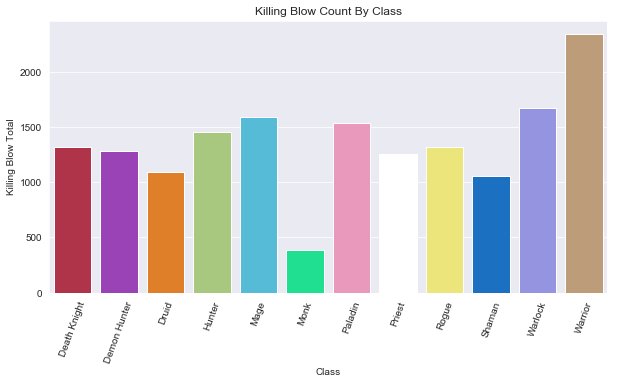

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Class', y='KB', estimator=sum, ci=None, order= classes, palette=class_colors)
plt.xticks(rotation='70')
plt.ylabel('Killing Blow Total')
plt.title('Killing Blow Count By Class')


- Based on HK it is the shaman.

In [10]:
df.groupby('Class').sum().sort_values('HK', ascending=False)[['HK']].head()

,HK
Class,
Shaman,15829
Druid,14499
Mage,13237
Warrior,13034
Paladin,12993


Text(0.5, 1.0, 'Group Kill Count By Class')

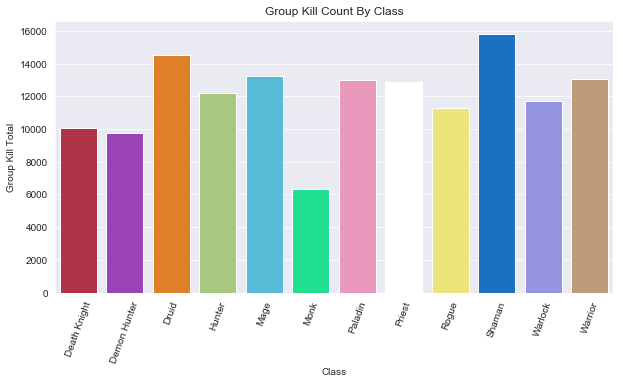

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Class', y='HK', estimator=sum, ci=None, order= classes, palette=class_colors)
plt.xticks(rotation='70')
plt.ylabel('Group Kill Total')
plt.title('Group Kill Count By Class')


### Which one dies more often?
- Shaman have the highest death count

In [12]:
df.groupby('Class').sum().sort_values('D', ascending=False)[['D']].head()

,D
Class,
Shaman,2008
Warrior,1905
Druid,1558
Hunter,1506
Mage,1439


Text(0.5, 1.0, 'Death Count By Class')

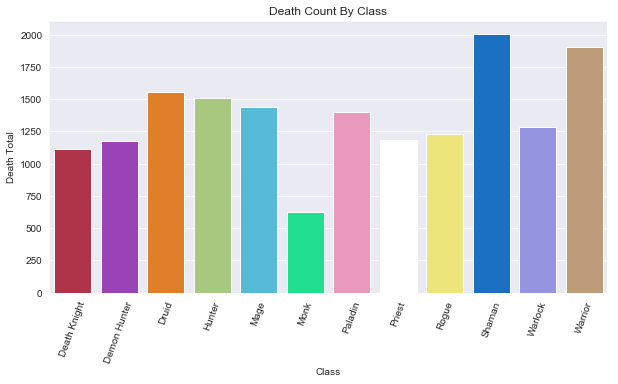

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Class', y='D', estimator=sum, ci=None, order= classes, palette=class_colors)
plt.xticks(rotation='70')
plt.ylabel('Death Total')
plt.title('Death Count By Class')


### Which class has the best Kill/Death/Assist score?

(I calculated KDA by subtracting deaths from kills and giving a third for assists)
- DKs have the best KDA score. 

In [14]:
df['KDA'] = df.KB - df.D + (df.HK/3)

df.groupby('Class').mean()[['KDA']].head()

,KDA
Class,
Death Knight,10.377065
Demon Hunter,8.910053
Druid,7.861511
Hunter,8.305038
Mage,9.517361


Text(0.5, 1.0, 'Average KDA Score By Class')

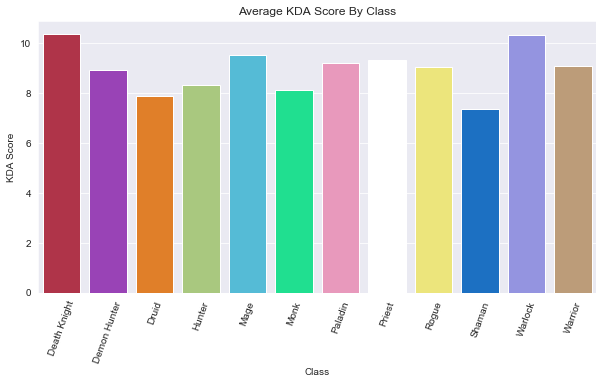

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Class', y='KDA', ci=None, order= classes, palette=class_colors)
plt.xticks(rotation='70')
plt.ylabel('KDA Score')
plt.title('Average KDA Score By Class')


### Which class are the best at doing damage?
- Priest has the highest damage done for those with the 'dps' role.

In [20]:
df[df['Rol']=='dps'].groupby('Class').mean().sort_values('DD', ascending=False)[['DD']].head()

,DD
Class,
Priest,67138.830097
Death Knight,60917.265306
Warlock,60418.447115
Paladin,58881.005435
Shaman,54470.410042


Text(0.5, 1.0, 'Average Damage Done By Class')

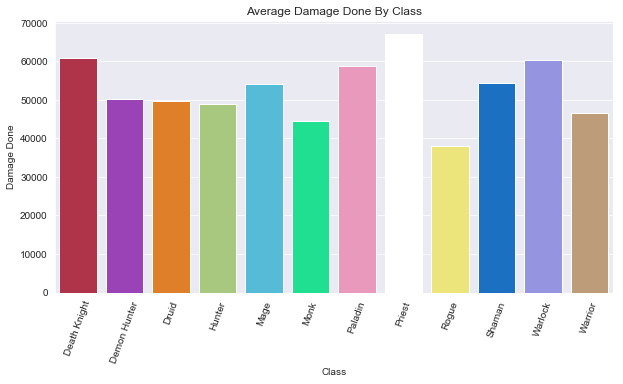

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(data=df[df['Rol']=='dps'], x='Class', y='DD', ci=None, order= classes, palette=class_colors)
plt.xticks(rotation='70')
plt.ylabel('Damage Done')
plt.title('Average Damage Done By Class')


### Which class are the best at healing?
- Monk has the highest healing done for those with the 'heal' role.

In [22]:
df[df['Rol']=='heal'].groupby('Class').mean().sort_values('HD', ascending=False)[['HD']]

,HD
Class,
Monk,101526.272059
Druid,93042.447761
Priest,91974.765385
Shaman,79755.796562
Paladin,75143.406780


Text(0.5, 1.0, 'Average Healing Done By Class')

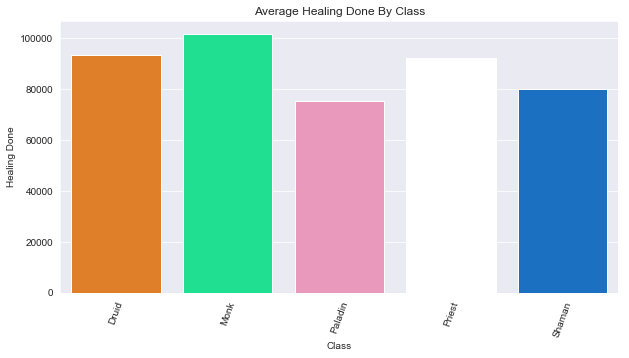

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=df[df['Rol']=='heal'], x='Class', y='HD', ci=None, order= healers, palette=healer_colors)
plt.xticks(rotation='70')
plt.ylabel('Healing Done')
plt.title('Average Healing Done By Class')


## Bonus Honor Gains

### Warsong Gulch Bonus Honor

#### How capturing one flag can affect the honor awarded?
- Number of flag caps for winners increases average honnor gain by 15, 39, 148.
- Number of flag caps for losers increases average honnor gain by 73, 198.


Text(0, 0.5, 'Honor Gained')

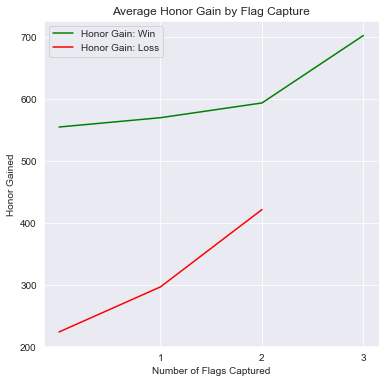

In [16]:
fc_win = wg_df[wg_df['Win']==1].groupby('FC').mean().rename(columns={'Honor': 'Honor Gain: Win'})[['Honor Gain: Win']]
fc_loss = wg_df[wg_df['Win']==0].groupby('FC').mean().rename(columns={'Honor': 'Honor Gain: Loss'})[['Honor Gain: Loss']]

plt.figure(figsize=(6,6))
sns.lineplot(data=fc_win, palette=win_color)
sns.lineplot(data=fc_loss, palette=loss_color)

plt.title('Average Honor Gain by Flag Capture')
plt.xlabel('Number of Flags Captured')
plt.xticks(ticks=list(range(1,4)))
plt.ylabel('Honor Gained')


### Battle for Gilneas Bonus Honor

#### How asulting/defending can affect the honor awarded?
- Looks like assulting gives the most honnor while defending can lower it.


Text(0, 0.5, 'Honor Gained')

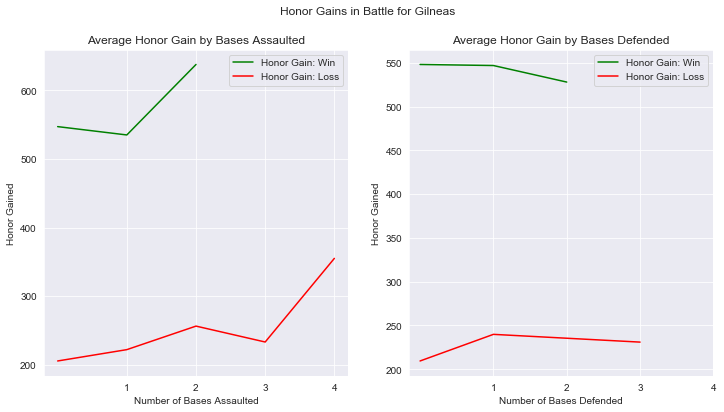

In [17]:
plt.figure(figsize=(12,6))
plt.suptitle('Honor Gains in Battle for Gilneas')

aslt_win = gil_df[gil_df['Win']==1].groupby('BA').mean().rename(columns={'Honor': 'Honor Gain: Win'})[['Honor Gain: Win']]
aslt_loss = gil_df[gil_df['Win']==0].groupby('BA').mean().rename(columns={'Honor': 'Honor Gain: Loss'})[['Honor Gain: Loss']]

plt.subplot(121)
sns.lineplot(data=aslt_win, palette=win_color)
sns.lineplot(data=aslt_loss, palette=loss_color)

plt.title('Average Honor Gain by Bases Assaulted')
plt.xlabel('Number of Bases Assaulted')
plt.xticks(ticks=list(range(1,5)))
plt.ylabel('Honor Gained')



def_win = gil_df[gil_df['Win']==1].groupby('BD').mean().rename(columns={'Honor': 'Honor Gain: Win'})[['Honor Gain: Win']]
def_loss = gil_df[gil_df['Win']==0].groupby('BD').mean().rename(columns={'Honor': 'Honor Gain: Loss'})[['Honor Gain: Loss']]

plt.subplot(122)
sns.lineplot(data=def_win, palette=win_color)
sns.lineplot(data=def_loss, palette=loss_color)

plt.title('Average Honor Gain by Bases Defended')
plt.xlabel('Number of Bases Defended')
plt.xticks(ticks=list(range(1,5)))
plt.ylabel('Honor Gained')


### Silvershard Mines Bonus Honor
#### How controlling carts can affect the honor awarded?
- Looks like honor shoots up at 5 carts for winners but dropps off for losing side.


Text(0, 0.5, 'Honor Gained')

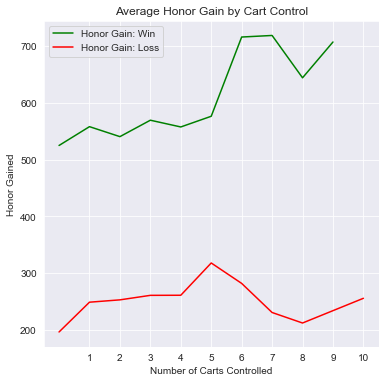

In [18]:
cc_win = sm_df[sm_df['Win']==1].groupby('CC').mean().rename(columns={'Honor': 'Honor Gain: Win'})[['Honor Gain: Win']]
cc_loss = sm_df[sm_df['Win']==0].groupby('CC').mean().rename(columns={'Honor': 'Honor Gain: Loss'})[['Honor Gain: Loss']]

plt.figure(figsize=(6,6))
sns.lineplot(data=cc_win, palette=win_color)
sns.lineplot(data=cc_loss, palette=loss_color)

plt.title('Average Honor Gain by Cart Control')
plt.xlabel('Number of Carts Controlled')
plt.xticks(ticks=list(range(1,11)))
plt.ylabel('Honor Gained')

### Temple of Kotmogu Bonus Honor
#### How can controlling orbs and getting victory points affect the honor awarded?
- Looks like you should focus VP and not go for only the orb to get the most honor.


Text(0, 0.5, 'Honor Gained')

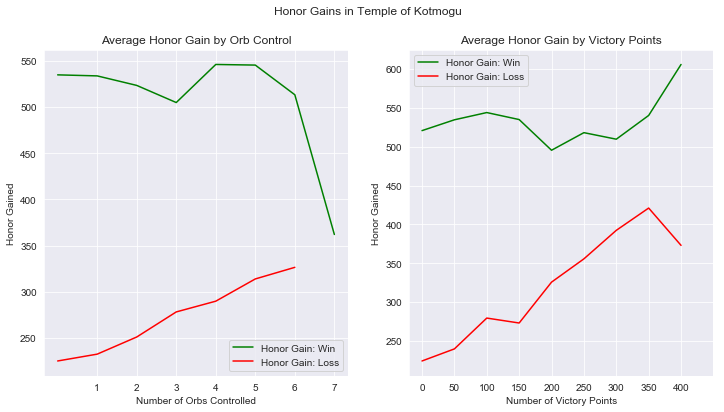

In [19]:
plt.figure(figsize=(12,6))
plt.suptitle('Honor Gains in Temple of Kotmogu')

orb_win = tk_df[tk_df['Win']==1].groupby('OP').mean().rename(columns={'Honor': 'Honor Gain: Win'})[['Honor Gain: Win']]
orb_loss = tk_df[tk_df['Win']==0].groupby('OP').mean().rename(columns={'Honor': 'Honor Gain: Loss'})[['Honor Gain: Loss']]

plt.subplot(121)
sns.lineplot(data=orb_win, palette=win_color)
sns.lineplot(data=orb_loss, palette=loss_color)

plt.title('Average Honor Gain by Orb Control')
plt.xlabel('Number of Orbs Controlled')
plt.xticks(ticks=list(range(1,8)))
plt.ylabel('Honor Gained')

tk_df['bin'] = pd.cut(tk_df[tk_df['Win']==1].VP, bins=list(range(0,500))[::50])
vp_win = pd.DataFrame(tk_df.groupby('bin').Honor.mean())
vp_win = vp_win.rename(columns={'Honor': 'Honor Gain: Win'})[['Honor Gain: Win']].reset_index()

tk_df['bin'] = pd.cut(tk_df[tk_df['Win']==0].VP, bins=list(range(0,500))[::50])
vp_loss = pd.DataFrame(tk_df.groupby('bin').Honor.mean())
vp_loss = vp_loss.rename(columns={'Honor': 'Honor Gain: Loss'})[['Honor Gain: Loss']].reset_index()

ax = plt.subplot(122)

vp_win.plot(ax=ax, color=win_color[0])
vp_loss.plot(ax=ax, color=loss_color[0])



plt.title('Average Honor Gain by Victory Points')
plt.xlabel('Number of Victory Points')
plt.xticks(ticks=list(range(0,10)), labels=['0','50','100','150','200','250','300','350','400' ])
plt.ylabel('Honor Gained')



## Modeling